In [2]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
from scipy.linalg import expm

import math
from utils.plotTools import plot_qwak
import os
import ast
import numpy as np
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

import numpy as np
import networkx as nx
from scipy.linalg import expm
import time

-180.0
Execution Time:  0.10499882698059082


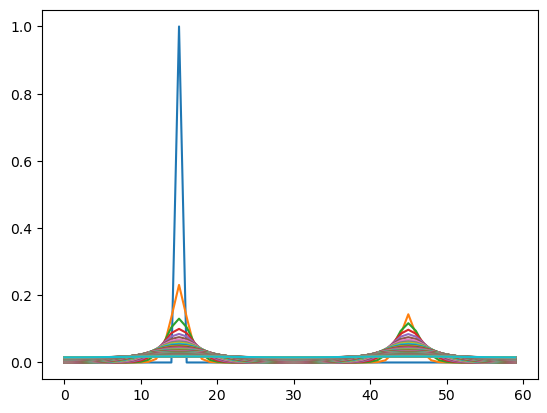

In [3]:
# Function to compute the transition matrix using expm
def transition_matrix(L, t):
    return expm(L * t)

# Function to compute the probability distribution
def probability_distribution(L, init, t):
    p0 = np.zeros(len(G))
    p0[init] = 1
    M_t = transition_matrix(L, t)
    return np.dot(M_t, p0)

# Parameters
gamma = 1.0  # Transition rate
n = 30
G = nx.circular_ladder_graph(n)
D = np.diag(list(dict(G.degree()).values()))
A = nx.to_numpy_array(G)
L = -gamma * (D - A)
print(np.trace(L))

# Initial state
init = n // 2
tl = 72

# Timing the execution
start_time = time.time()

for t in np.linspace(0, tl, 100):
    p_t = probability_distribution(L, init, t)
    plt.plot(list(p_t))
# p_t = probability_distribution(L, init, 1)
# print(p_t.round(5))
# plt.plot(list(p_t))
# plt.xlim(200,300)
# Print execution time
print("Execution Time: ", time.time() - start_time)


Execution Time:  0.06199908256530762


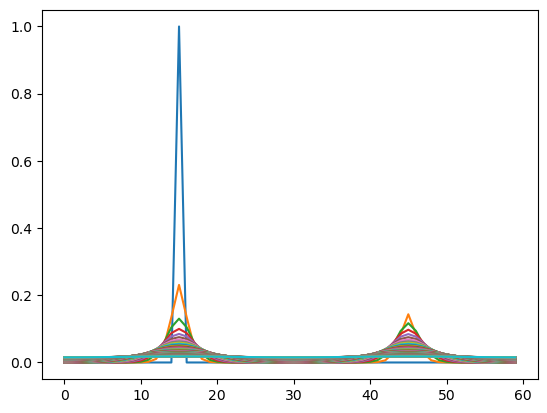

In [4]:
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import time

# Eigenvalue decomposition
eigenvalues, eigenvectors = eigh(L)

# Efficient transition matrix computation
def efficient_transition_matrix(eigenvalues, eigenvectors, t):
    D_t = np.diag(np.exp(eigenvalues * t))
    return eigenvectors @ D_t @ np.linalg.inv(eigenvectors)

# Timing the execution
start_time = time.time()

for t in np.linspace(0, tl, 100):
    M_t_efficient = efficient_transition_matrix(eigenvalues, eigenvectors, t)
    p0 = np.zeros(len(L))
    p0[n // 2] = 1
    p_t = np.dot(M_t_efficient, p0)
    plt.plot(p_t)

    
# M_t_efficient = efficient_transition_matrix(eigenvalues, eigenvectors, 0.1)
# print(M_t_efficient.round(2))
# p0 = np.zeros(len(L))
# # p0[n // 2] = 1
# p0[0] = 1
# p_t = np.dot(M_t_efficient, p0)
# plt.plot(p_t)
# # Print execution time
print("Execution Time: ", time.time() - start_time)


0.9999999999999989


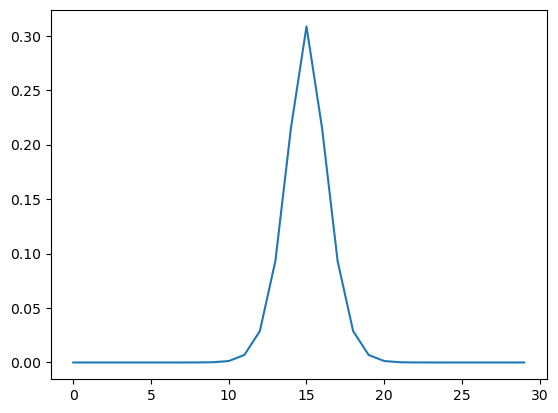

In [12]:
n = 30
gamma = 1.0  # Transition rate
t=1

G = nx.cycle_graph(n)
D = np.diag(list(dict(G.degree()).values()))
A = nx.to_numpy_array(G)
L = -gamma * (D - A)

eigenvalues, eigenvectors = eigh(L)

trans_mat = efficient_transition_matrix(eigenvalues, eigenvectors, t)

p0 = np.zeros(len(L))
p0[n // 2] = 1
p_t = np.dot(trans_mat, p0)

plt.plot(p_t)

tot_prob = 0

for x in p_t:
    tot_prob += x

print(tot_prob)